Ekerö 341.180794416061 sek/capita 134.0
Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Svalöv 362.49065693430657 sek/capita 37.4
Malmö 1404.4706590225687 sek/capita 2277.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Gullspång 1450.1848942598187 sek/capita 16.5
Bengtsfors 1444.6974543816175 sek/capita 10.5
Åmål 1796.252666609779 sek/capita 25.4
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
Krokom 374.59672064503013 sek/capita 2.5
Bjurholm 1465.5822616407982 sek/capita 1.8
Arvidsjaur 1562.0885363357215 sek/capita 1.1
Vallentuna 8553187.5 97.4
Österåker 6566326.571428572 157.3
Värmdö 9686567.2 104.6
Järfälla 8223620.0 158

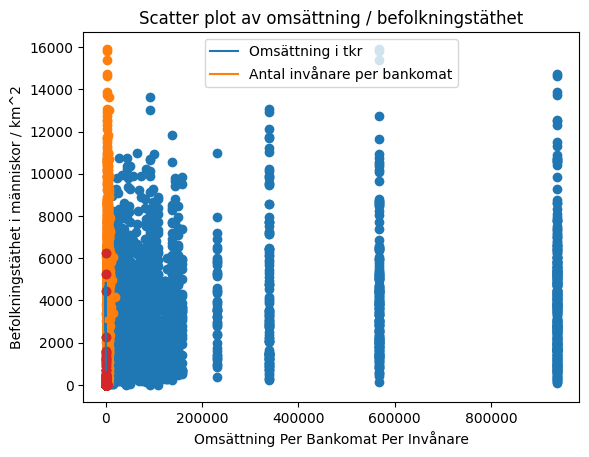

In [1]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from random import randint
from data_parsing import DataParser
from analysis_models import AnalysModeller
from bankomat import Bankomat

data = DataParser()
data.laddaKommuner()
data.laddaBankomater()
analyser = AnalysModeller(data)


analyser.slumpmässigBankomatOmsättning()
analyser.scatterPlotOmsättningPerInvånare()
analyser.scatterPlotOmsättningPerInvånarePerBankomat()
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()
analyser.scatterPlotOmsättningPerAutomatMotBefolkningstäthet()


In [2]:
Address = Bankomat.geographicalData["address"]

print(Address)


AttributeError: type object 'Bankomat' has no attribute 'geographicalData'

In [ ]:
def dataframe(month):
    year = int(month[0:4])
    dataDict = defaultdict(dict)

    for kommun in data.kommuner:
        try:
            namn = kommun.namn
            befolkning = kommun.data[month]["total"]
            totalOmsättning = kommun.totalOmsättning
            omsättningPerInvånare = kommun.omsättningPerInvånare
            antalBankomater = kommun.antalBankomater
            befolkningstäthet = kommun.befolkningstätheter[year]
            snittÅlder = kommun.snittÅlder
            antalTransaktioner = kommun.totalTransaktionsAntal
            antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
            genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
            antalInvånarePerBankomat = befolkning / kommun.antalBankomater
            utrikesFödda = kommun.utrikesfödda[year]
            andelUtrikesfödda = utrikesFödda / befolkning
            dataDict[namn] = {
                "Date" : month,
                "Befolkning": befolkning,
                "Total Omsättning": totalOmsättning,
                "Omsättning per Invånare": omsättningPerInvånare,
                "Antal Bankomater": antalBankomater,
                "Befolknigstäthet": befolkningstäthet,
                "Genomsnittlig Ålder": snittÅlder,
                "Antal Transaktioner": antalTransaktioner,
                "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
                "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek,
                "Antal Invånare Per Bankomat": antalInvånarePerBankomat,
                "Utrikesfödda": utrikesFödda,
                "Andel utrikesfödda": andelUtrikesfödda,
            }
        except: 
            pass

    df = pd.DataFrame(dataDict)

    return df


df = dataframe("2014M01")


"""for month in data.kommuner[0].data.keys():
    if month != "2014M01": 
        new_df = dataframe(month)
        df = pd.concat([df, new_df], axis=1)

to_csv = df.to_csv("data.csv", index=False)
print(df)"""

print(df)


                                    Vallentuna    Österåker       Värmdö   
Date                                   2014M01      2014M01      2014M01  \
Befolkning                               29765        38456        37770   
Total Omsättning                      34212750     45964286     48432836   
Omsättning per Invånare             513.967341   492.608201    546.95467   
Antal Bankomater                             4            7            5   
Befolknigstäthet                          89.4        131.8         90.5   
Genomsnittlig Ålder                         42           43           43   
Antal Transaktioner                      14218        17855        18603   
Antal Transaktioner Per Bankomat        3554.5  2550.714286       3720.6   
Genomsnittlig Transaktionsstorlek  2406.298354  2574.308933  2603.495995   
Antal Invånare Per Bankomat            7441.25  5493.714286       7554.0   
Utrikesfödda                              3943         5606         4674   
Andel utrike

In [28]:
addresser = [bankomat.geographicalData["address"] for bankomat in data.bankomater]
kommuner = [bankomat.geographicalData["kommun"] for bankomat in data.bankomater]

positionDataframe = pd.DataFrame([addresser, kommuner]).T
positionDataframe = positionDataframe.drop_duplicates()
print(positionDataframe)

                        0             1
0           Kungsgatan 44     Karlshamn
1       Drottninggatan 61     Karlshamn
2            Storgatan 25     Karlshamn
3       Drottninggatan 55     Karlshamn
5     Sölvesborgsvägen 35     Karlshamn
...                   ...           ...
2780         Storgatan 15  Valdemarsvik
2781          Kisavägen 2          Ydre
2782    Adelswärdsgatan 1    Åtvidaberg
2783          Torggatan 1    Åtvidaberg
2785         Klubbgatan 3       Ödeshög

[2029 rows x 2 columns]


In [24]:

test = []

for bankomat in data.bankomater:
    address = bankomat.geographicalData["address"]
    municipality = bankomat.geographicalData["kommun"]
    test.append([address, municipality])

df2 = pd.DataFrame(test, columns=["Address", "Kommun"])
df2 = df2.drop_duplicates()

#print(df2)

print(df2.to_string())

                              Address           Kommun
0                       Kungsgatan 44        Karlshamn
1                   Drottninggatan 61        Karlshamn
2                        Storgatan 25        Karlshamn
3                   Drottninggatan 55        Karlshamn
5                 Sölvesborgsvägen 35        Karlshamn
6                  Holländarevägen 68        Karlshamn
7                   Drottninggatan 39        Karlshamn
9                     Ronnebygatan 44       Karlskrona
10                    Ronnebygatan 43       Karlskrona
12                    Ronnebygatan 47       Karlskrona
13                   Lasarettsvägen 1       Karlskrona
14                Västra riksvägen 11       Karlskrona
15                Borgmästaregatan 13       Karlskrona
18                   Stationsvägen 20       Karlskrona
19                       Verkövägen 5       Karlskrona
21                     Idrottsvägen 2       Karlskrona
23                      Stortorget 10       Karlskrona
24        

In [15]:
from geopy.geocoders import Nominatim
from geopy.distance import distance

# Set up geocoder
geolocator = Nominatim(user_agent="bankomatavstånd")



AttributeError: 'NoneType' object has no attribute 'latitude'

In [44]:
from geopy.geocoders import MapBox
from geopy.exc import GeocoderTimedOut

def geocode_address(address):
    geolocator = MapBox(api_key='pk.eyJ1IjoiYmF3YXItZiIsImEiOiJjbGhzYWwzbWMwNXJrM2RwNXV4dW4wdnBqIn0.bLd60tqev8LELZ9cS9I1Rw')
    location = None

    try:
        address = row.to_string(index=False) # Convert the row to a string
        location = geolocator.geocode(address)
    except GeocoderTimedOut:
        return geocode_address(address)  # Retry if a timeout error occurs

    if location is not None:
        return location.latitude, location.longitude

    return None, None  # Return None if coordinates couldn't be obtained

#rows = df2.values.tolist()  # Convert DataFrame rows to a list of lists
latitudes = []
longitudes = []

for row in df2:
    latitude, longitude = geocode_address(row)
    latitudes.append(latitude)
    longitudes.append(longitude)


df2['Latitude'] = latitudes
df2['Longitude'] = longitudes

print(df2)

"""
# Test the geocoding 
test = 'forshagagatan 76, stockholm'
latitude, longitude = geocode_address(test)
print(f'Latitude: {latitude}, Longitude: {longitude}')
"""

AttributeError: 'list' object has no attribute 'to_string'

In [34]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def get_coordinates(address):
    geolocator = Nominatim(user_agent="my_app")  # Create a geolocator object
    location = None

    try:
        location = geolocator.geocode(address)  # Geocode the address
    except GeocoderTimedOut:
        return get_coordinates(address)  # Retry if a timeout error occurs

    if location is not None:
        return location.latitude, location.longitude  # Return the coordinates if found

    return None  # Return None if coordinates couldn't be obtained

for rows in df2:
    print(rows)
    print(get_coordinates(rows))

#coordinates = get_coordinates(df2.iloc[0].to_string(index=False))
#print(coordinates)



                  Address        Kommun Latitude Longitude
0           Kungsgatan 44     Karlshamn     None      None
1       Drottninggatan 61     Karlshamn     None      None
2            Storgatan 25     Karlshamn     None      None
3       Drottninggatan 55     Karlshamn     None      None
5     Sölvesborgsvägen 35     Karlshamn     None      None
...                   ...           ...      ...       ...
2780         Storgatan 15  Valdemarsvik     None      None
2781          Kisavägen 2          Ydre     None      None
2782    Adelswärdsgatan 1    Åtvidaberg     None      None
2783          Torggatan 1    Åtvidaberg     None      None
2785         Klubbgatan 3       Ödeshög     None      None

[2029 rows x 4 columns]
Address
(51.575646, -0.0986474)
Kommun
None
Latitude
(33.6806307, -78.9605439)
Longitude
(51.21946235, 4.367081032283213)


In [19]:
df2["Latitude"] = ""
df2["Longitude"] = ""

for index, row in df2.iterrows():
    address = row["Address"]
    municipality = row["Kommun"]
    location = geolocator.geocode(f"{address}, {municipality}")
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        df2.at[index, "Latitude"] = latitude
        df2.at[index, "Longitude"] = longitude


KeyboardInterrupt: 